<a href="https://colab.research.google.com/github/mahmoudgamiel28/Tic-Tac-Toc-Game/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data for all**

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
import os 
os.chdir('drive/My Drive')

## Import important libraries 

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense ,Conv2D ,Flatten, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy
from keras.models import load_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


## Data importing & augmentation 

In [0]:
train_data_path = '.Data/train'
test_data_path  = '.Data/test'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(400, 400),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(400, 400),
        batch_size=32,
        class_mode='binary')

## Build a CNN model & Compile it

In [0]:
model = Sequential([
                    Conv2D(64,kernel_size=3,input_shape=(400,400,3)),
                    Conv2D(64,kernel_size=3),
                    Conv2D(64,kernel_size=3),
                    MaxPool2D(2),
                    MaxPool2D(2),
                    Flatten(),
                    Dense(256,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(64,activation='relu'),
                    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

## Traning the model

In [0]:
h = model.fit_generator(training_set,validation_data=test_set,epochs=2,steps_per_epoch=len(training_set),
                        callbacks = [early_stopping])

In [0]:
model.save('facerecognation2_model.h5')

In [7]:
h.history

{'accuracy': [0.826, 1.0],
 'loss': [5.514531692268725, 9.271217126411102e-06],
 'val_accuracy': [1.0, 1.0],
 'val_loss': [1.8040055920209852e-06, 9.64489913712896e-07]}

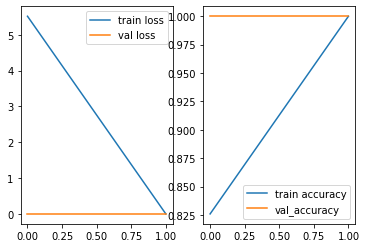

In [8]:
fig, ax = plt.subplots(1,2)
ax[0].plot(h.history['loss'], label='train loss')
ax[0].plot(h.history['val_loss'], label='val loss')
ax[0].legend()
ax[1].plot(h.history['accuracy'], label='train accuracy')
ax[1].plot(h.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
plt.show()

In [0]:
model = load_model('facerecognation2_model.h5')


In [0]:
image = cv2.imread('18.jpg')
image = cv2.resize(image,(400,400))
image=np.reshape(image,(1,400,400,3))
y_pred = model.predict(image)

In [0]:
image = cv2.imread('23.jpg')
image = cv2.resize(image,(400,400))
image=np.reshape(image,(1,400,400,3))
y_pred_1 = model.predict(image)

In [14]:
print(y_pred)
print(y_pred_1)

[[0.]]
[[0.]]
